# Correlation of regression weights

This notebook examines the correlation of regression weights estimated via Ridge regression across tasks and across cross-validation folds within a task. It outputs plots that are used for Figure S8.

In [2]:
task_names = ["treecover", "elevation", "population"]

In [3]:
%load_ext autoreload
%autoreload 2

import os
from pathlib import Path

import pandas as pd

import mosaiks.diagnostics.model.beta_correlation_fxns as bf
import mosaiks.plotting.beta_corr_fig_fxns as fig_fns
from mosaiks import config as c
from mosaiks import transforms
from mosaiks.solve import data_parser as parse
from mosaiks.utils import io

out_dir = Path(c.res_dir) / "figures" / "FigS8"
out_dir.mkdir(parents=True, exist_ok=True)

In [4]:
# Load labels
ys = {}
for t in task_names:
    c_app = getattr(c, t)
    y = io.get_Y(io.get_filepaths(c, t), c_app["colname"])
    transform = getattr(transforms, f"transform_{t}")
    _, y, _ = transform(y, y, y, c_app["logged"])
    y.name = t
    ys[t] = y
y_all_tasks = pd.concat(ys, axis=1, join="inner")

# Load features
X, _ = io.get_X_latlon(c, "UAR")
X = X.reindex(y_all_tasks.index)

# split off test set
X_train, X_test, y_train, y_test = parse.split_data_train_test(
    X.values,
    y_all_tasks.values,
    frac_test=c.ml_model["test_set_frac"],
    seed=c.ml_model["seed"],
)

/home/bolliger/miniconda3/envs/mosaiks-env/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## Make correlation plots

on fold (of 5): 1 2 3 4 on fold (of 5): 1 2 3 4 Cross-fold r2 (treecover, elevation): [[0.03434498 0.036991   0.03411714 0.04617441]
 [0.87794992 0.04645124 0.03400209 0.04497461]
 [0.88181459 0.86799358 0.03967261 0.04568215]
 [0.87994502 0.88069843 0.88370198 0.05640312]]
Cross-fold r2 (elevation, treecover): [[0.03434498 0.03862787 0.03436526 0.03624265]
 [0.83051205 0.04645124 0.04166026 0.03999583]
 [0.81422645 0.82658484 0.03967261 0.03354612]
 [0.80486737 0.81181832 0.82891672 0.05640312]]
on fold (of 5): 1 2 3 4 on fold (of 5): 1 2 3 4 Cross-fold r2 (treecover, population): [[0.0183254  0.02439959 0.02003597 0.03408326]
 [0.86482818 0.0271632  0.01601378 0.0320763 ]
 [0.86327187 0.81830732 0.01718899 0.03142858]
 [0.88467568 0.84616676 0.87314862 0.04044261]]
Cross-fold r2 (population, treecover): [[0.0183254  0.01570631 0.01394886 0.01994332]
 [0.77420729 0.0271632  0.02541997 0.02883136]
 [0.77216266 0.77005792 0.01718899 0.01729666]
 [0.77309006 0.78601891 0.79020963 0.04044

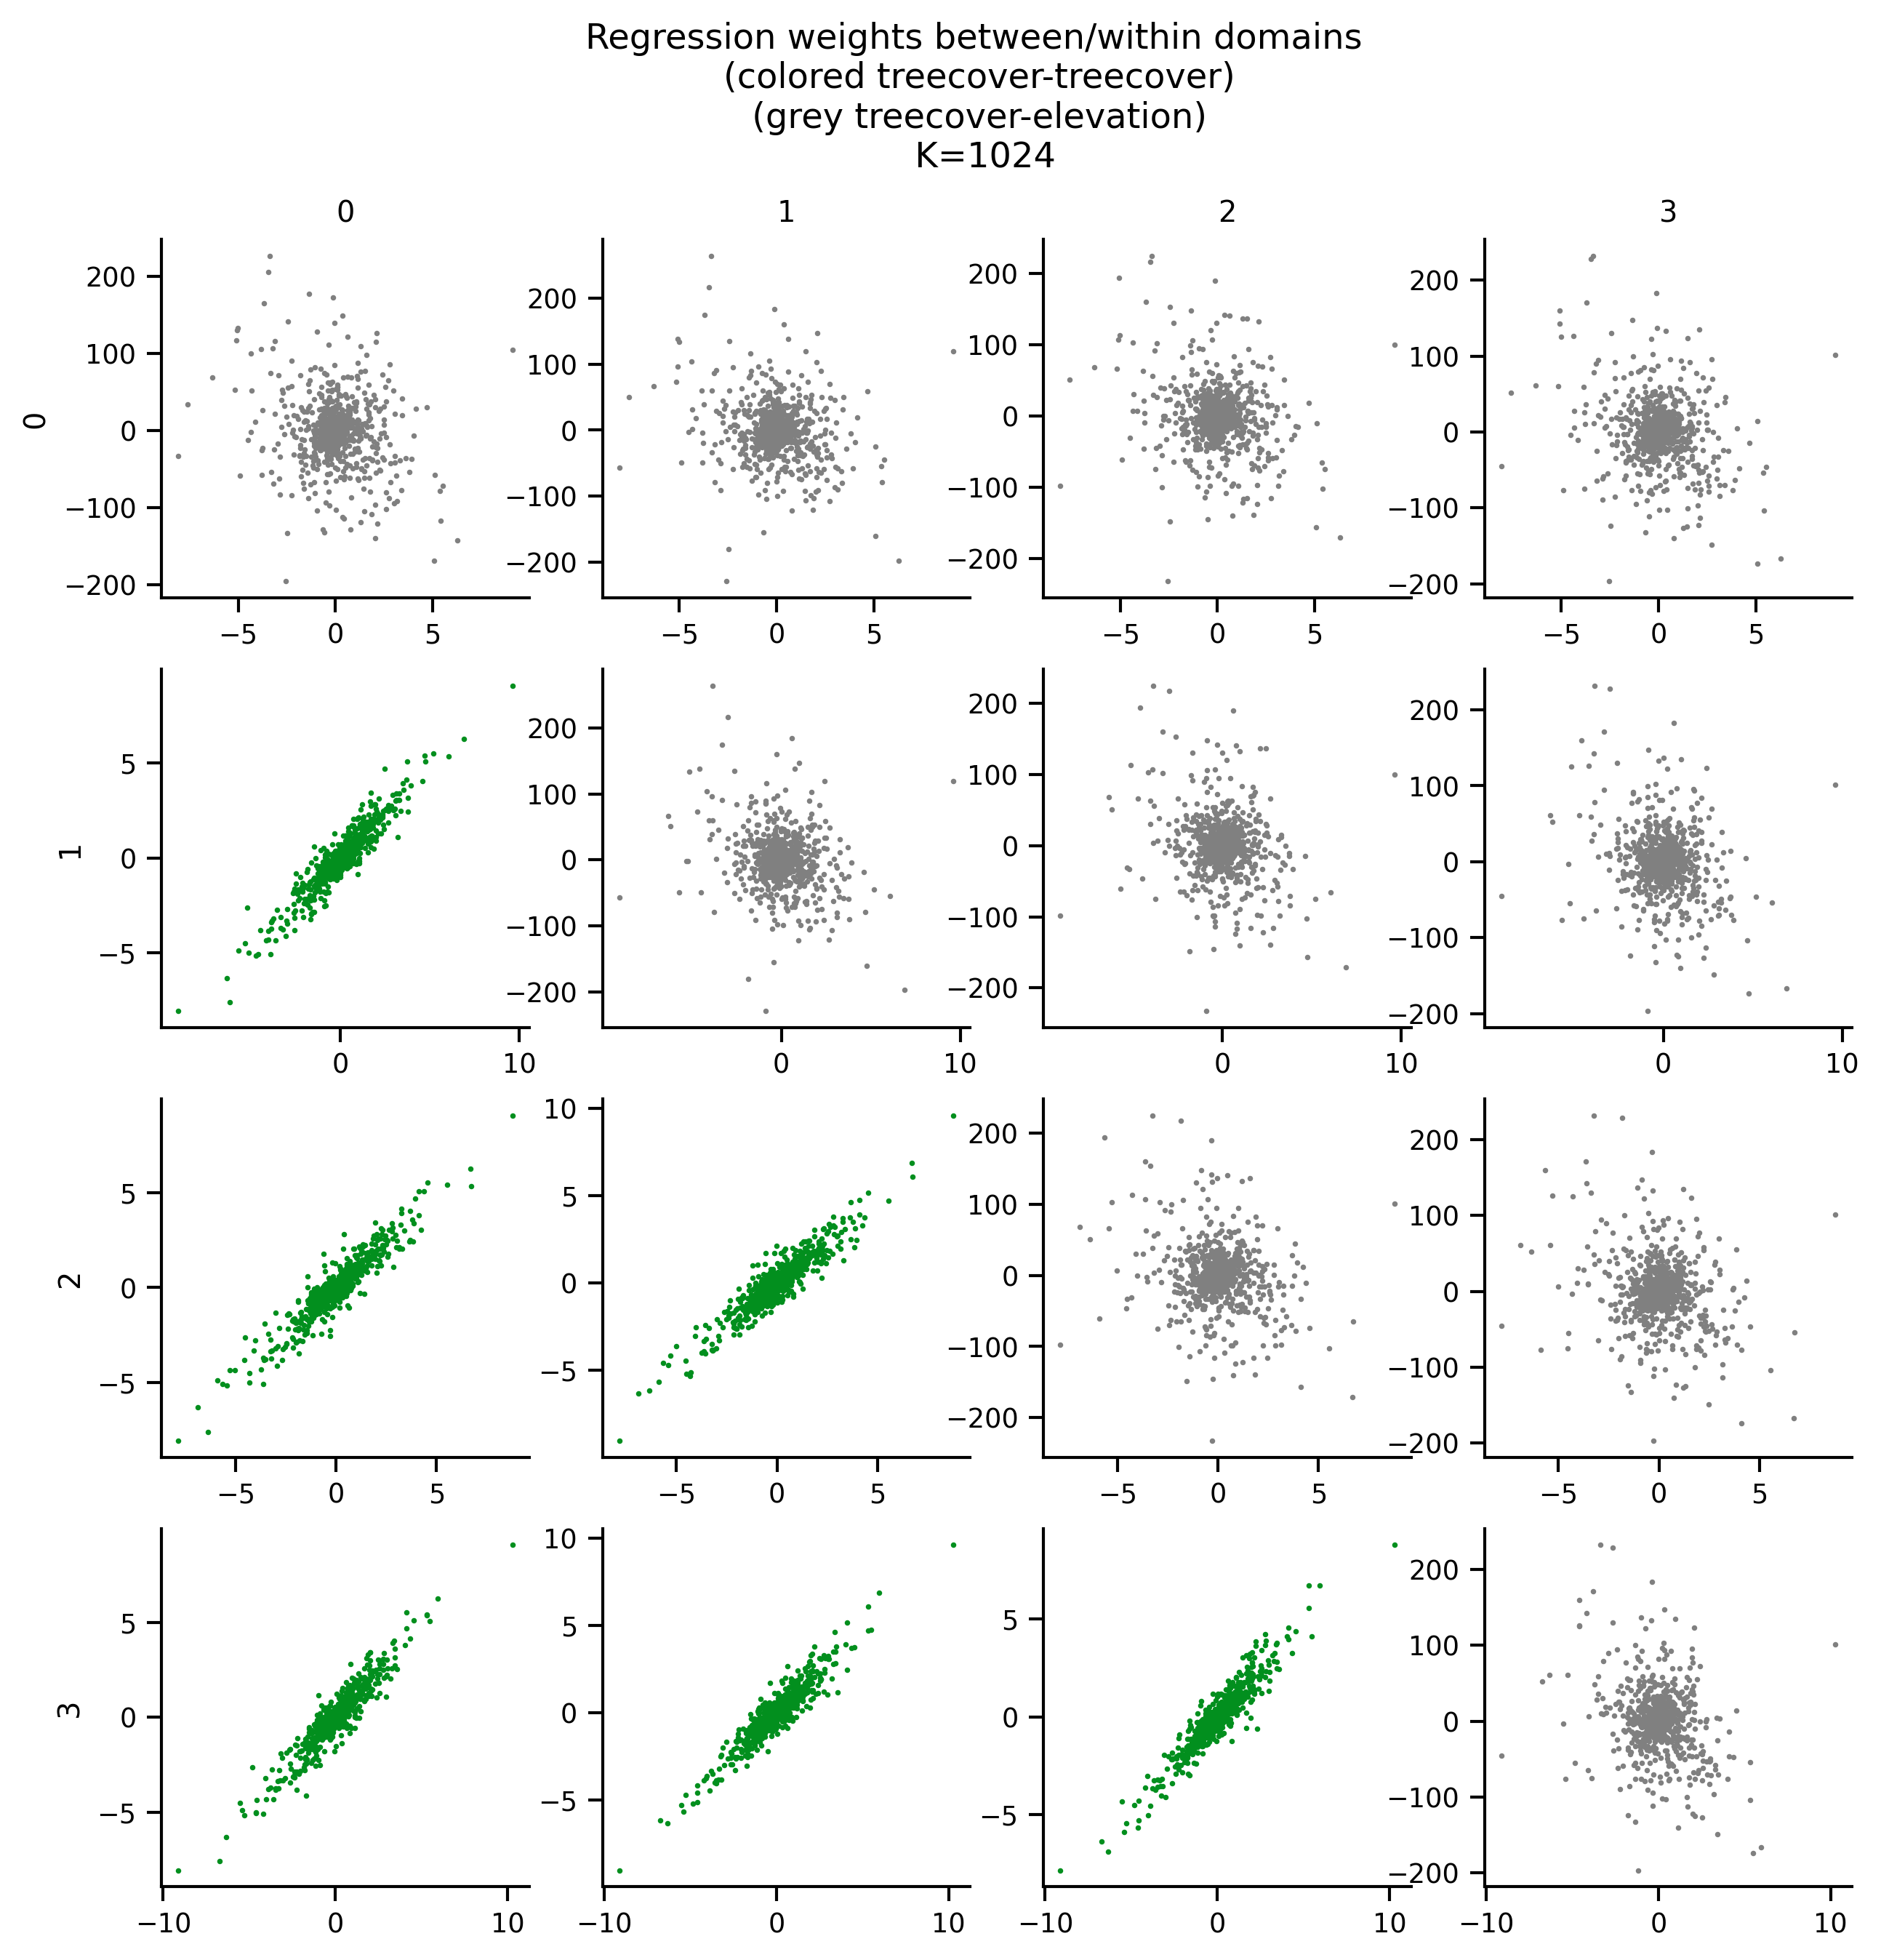

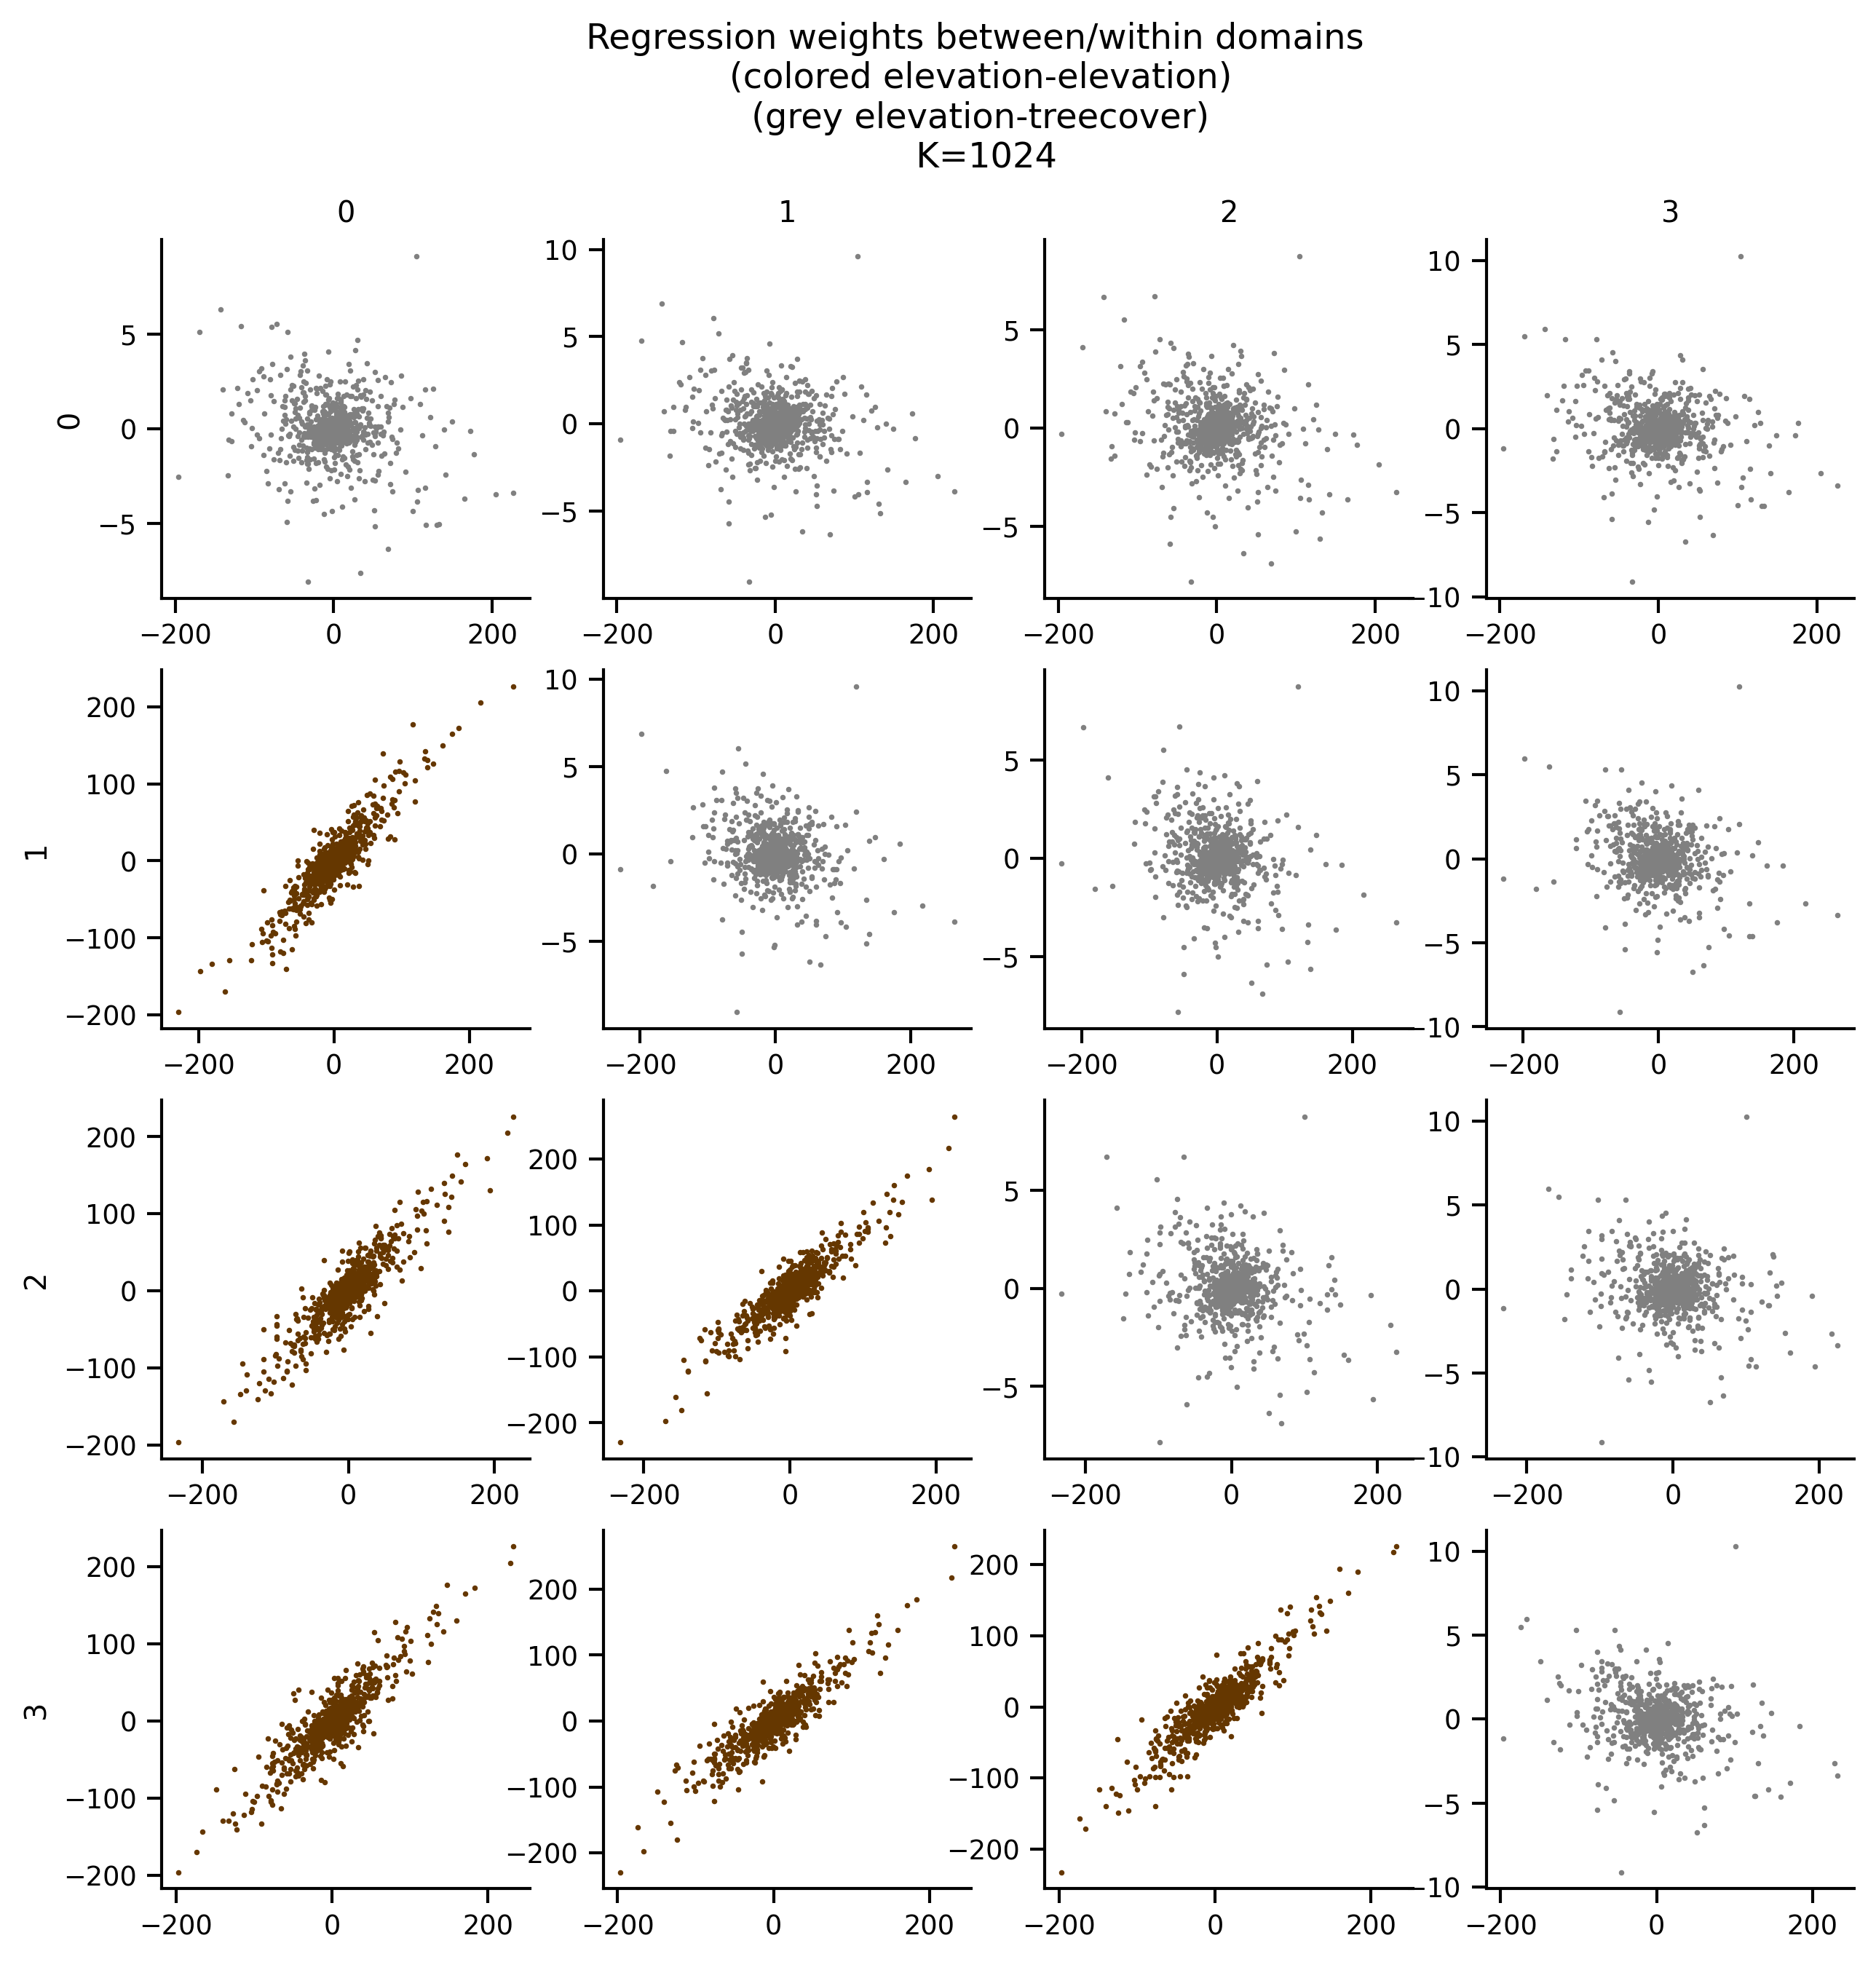

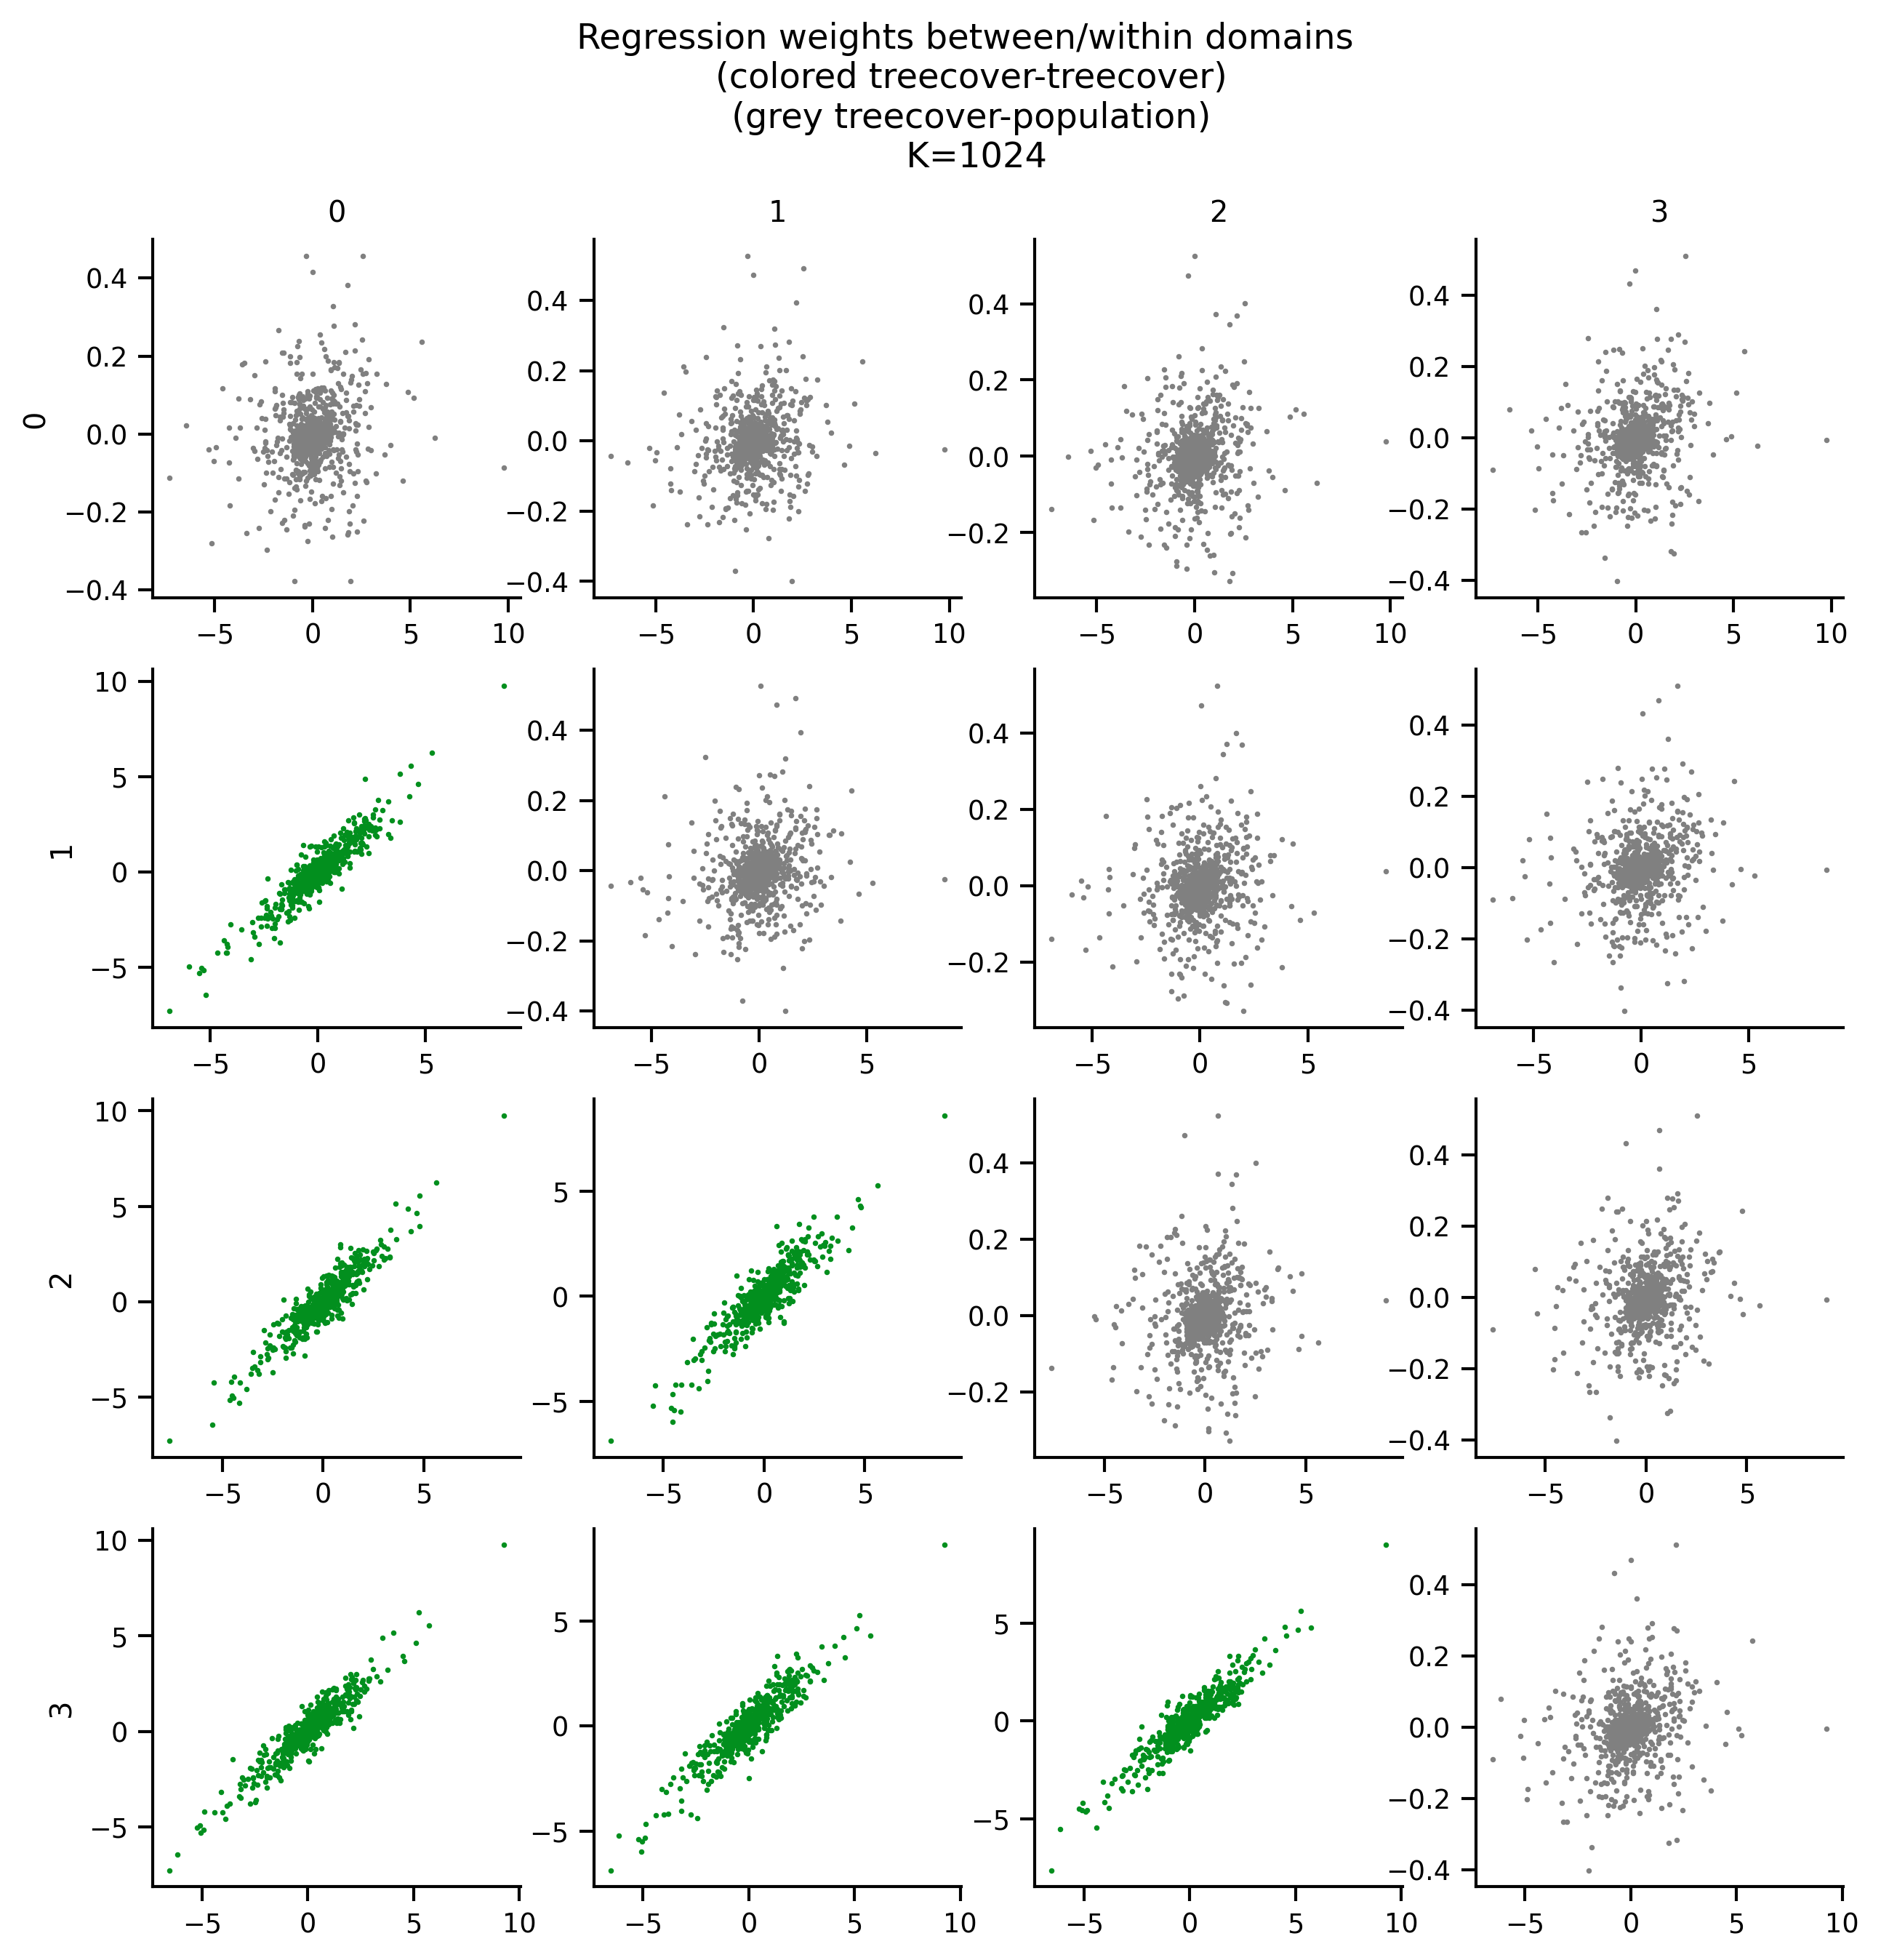

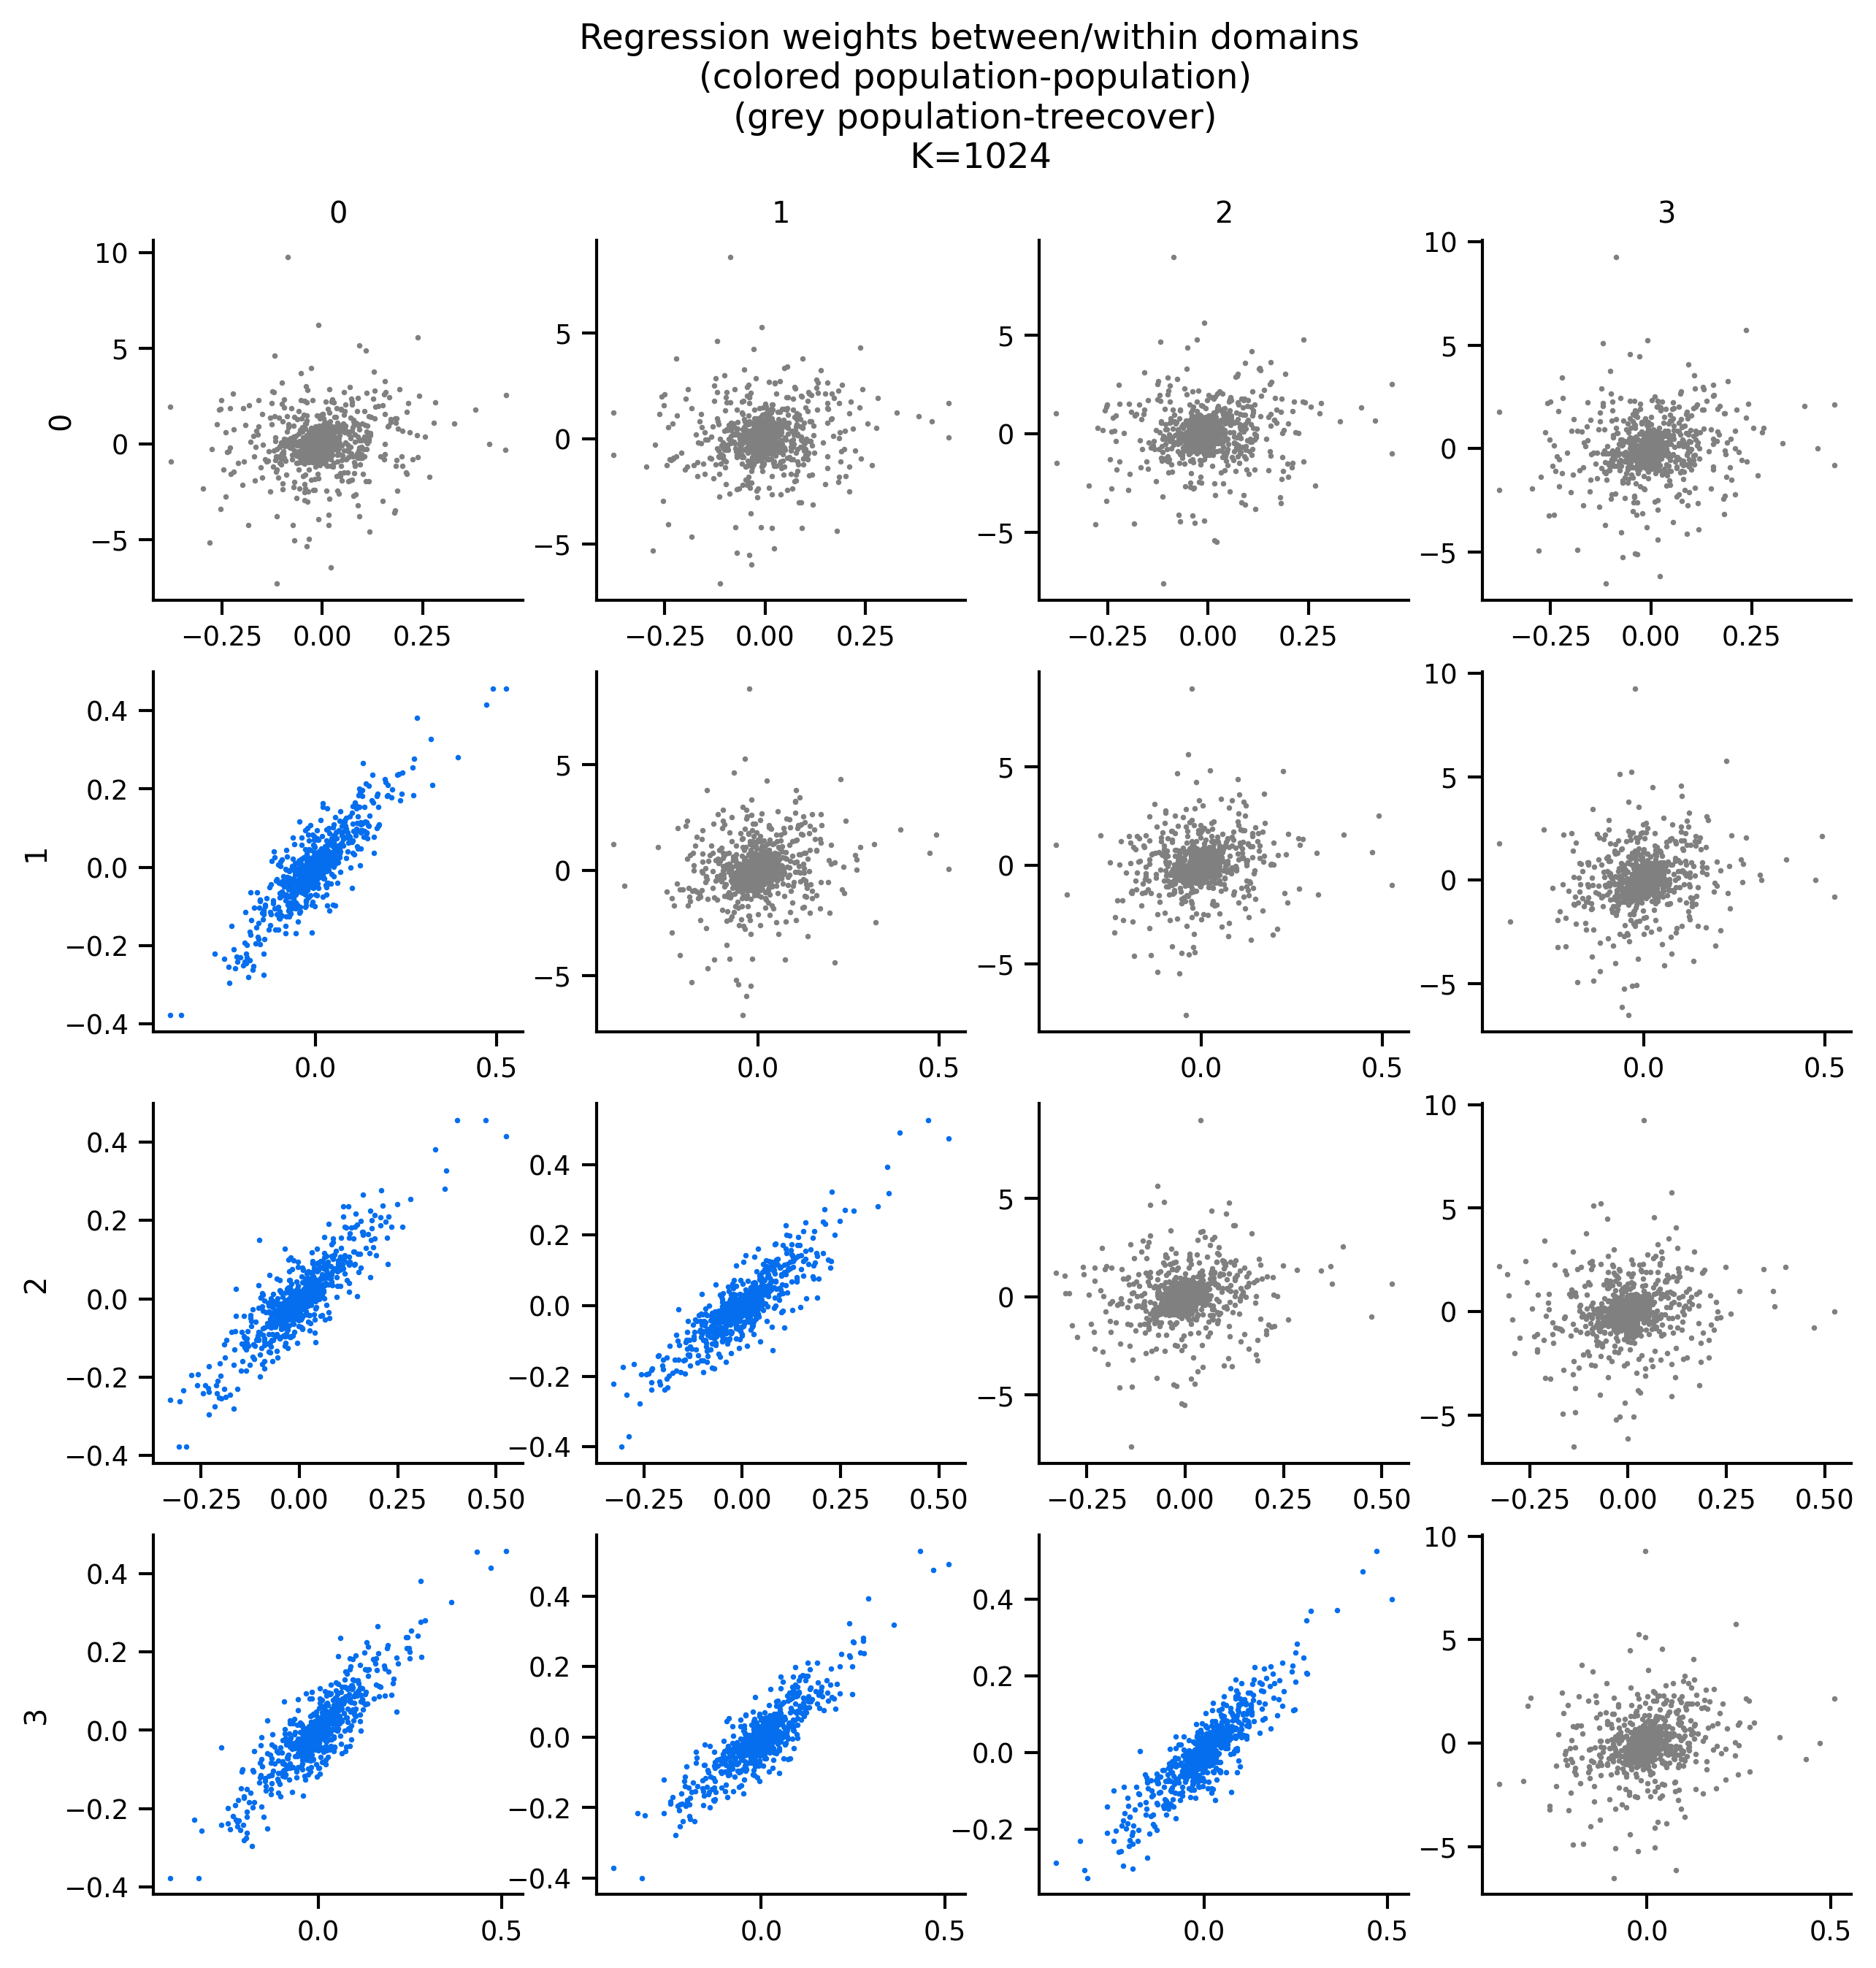

In [6]:
task_name_a = "treecover"
d = 1024
idx_a = task_names.index(task_name_a)

for task_name_b in ["elevation", "population"]:
    idx_b = task_names.index(task_name_b)

    weights_a, weights_b = bf.compute_beta_correlations(
        task_name_a, task_name_b, idx_a, idx_b, y_train, X_train, d=d
    )

    fig, _ = fig_fns.plot_beta_correlations(
        weights_a, weights_b, task_name_a, task_name_b, d, dpi=300
    )
    fig.savefig(
        out_dir / f"corr_{task_name_a}_{task_name_b}_k_is_{d}.pdf",
        bbox_inches="tight",
        dpi="figure",
        tight_layout=True,
    )

    fig, _ = fig_fns.plot_beta_correlations(
        weights_b, weights_a, task_name_b, task_name_a, d, dpi=300
    )
    fig.savefig(
        out_dir / f"corr_{task_name_b}_{task_name_a}_k_is_{d}.pdf",
        bbox_inches="tight",
        dpi="figure",
        tight_layout=True,
    )